In [2]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import  ImageDataGenerator
from google.colab import  files

In [3]:
uploaded = files.upload()

Saving sign_mnist_test.csv to sign_mnist_test.csv
Saving sign_mnist_train.csv to sign_mnist_train.csv


In [4]:
def get_data(filename):
    with open(filename) as training_file:
        reader = csv.reader(training_file, delimiter=',')    
        imgs = []
        labels = []

        next(reader, None)
        
        for row in reader:
            label = row[0]
            data = row[1:]
            img = np.array(data).reshape((28, 28))

            imgs.append(img)
            labels.append(label)

        images = np.array(imgs).astype(float)
        labels = np.array(labels).astype(float)

    return images, labels

training_images, training_labels = get_data('sign_mnist_train.csv')
testing_images, testing_labels = get_data('sign_mnist_test.csv')

print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [5]:
training_images = np.expand_dims(training_images, axis=3)
testing_images = np.expand_dims(testing_images, axis=3)

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)
validation_datagen = ImageDataGenerator(
    rescale  = 1/255
)
print(training_images.shape)
print(testing_images.shape)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [11]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(26, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy'])

train_gen = train_datagen.flow(
    training_images,
    training_labels,
    batch_size=64
)
val_gen = validation_datagen.flow(
    testing_images,
    testing_labels,
    batch_size=64
)

history = model.fit(train_gen,
                    epochs=20,
                    validation_data=val_gen)

model.evaluate(testing_images, testing_labels)

Epoch 1/20
429/429 [==============================] - 28s 65ms/step - loss: 3.0285 - accuracy: 0.0986 - val_loss: 1.8583 - val_accuracy: 0.3847
Epoch 2/20
429/429 [==============================] - 28s 65ms/step - loss: 2.1686 - accuracy: 0.3193 - val_loss: 1.6388 - val_accuracy: 0.4501
Epoch 3/20
429/429 [==============================] - 28s 65ms/step - loss: 1.7825 - accuracy: 0.4318 - val_loss: 1.0435 - val_accuracy: 0.6442
Epoch 4/20
429/429 [==============================] - 28s 65ms/step - loss: 1.5189 - accuracy: 0.5116 - val_loss: 0.9372 - val_accuracy: 0.6661
Epoch 5/20
429/429 [==============================] - 28s 64ms/step - loss: 1.3153 - accuracy: 0.5706 - val_loss: 0.7544 - val_accuracy: 0.7319
Epoch 6/20
429/429 [==============================] - 28s 65ms/step - loss: 1.1729 - accuracy: 0.6177 - val_loss: 0.7680 - val_accuracy: 0.7341
Epoch 7/20
429/429 [==============================] - 28s 65ms/step - loss: 1.0398 - accuracy: 0.6602 - val_loss: 0.6141 - val_accuracy:

[61.164794921875, 0.8219464421272278]

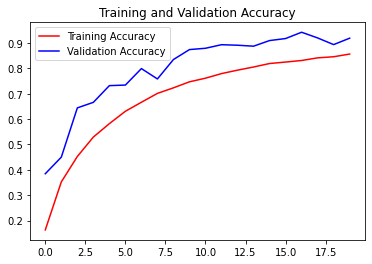

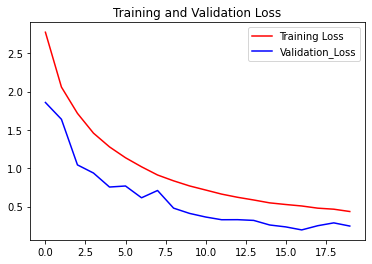

In [15]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs=range(len(acc))

plt.plot(epochs, acc, 'r', label ='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation_Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()